In [54]:
import pandas as pd

# 讀取用戶上傳的 CSV 文件
file_path = '/Users/linwei-chi/Desktop/R final project/carbonpred_variables_version2.csv'
df = pd.read_csv(file_path)
# 顯示前幾列的資料以檢查其結構和內容
df.head(), df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Columns: 561 entries, Date to ftse_OBV_(3, 12)
dtypes: float64(560), object(1)
memory usage: 1.9+ MB


(         Date  carbon.Price  carbon.Open  carbon.High  carbon.Low  carbon.Vol  \
 0  2022-07-19         83.65        85.20        85.20       82.80       20.97   
 1  2022-07-20         78.84        83.60        83.64       78.70       38.18   
 2  2022-07-21         78.11        79.20        79.80       77.65       31.89   
 3  2022-07-22         76.30        78.20        79.80       76.00       28.56   
 4  2022-07-25         76.37        76.12        78.42       75.49       22.15   
 
      clean  oil.Price  oil.Open  oil.High  ...  ibex_OBV_(2, 9)  \
 0  1249.32     107.35    105.74    107.61  ...       -33447.222   
 1  1261.67     106.92    107.07    107.45  ...        52696.667   
 2  1253.44     103.86    106.49    106.78  ...       -63426.667   
 3  1253.04     103.20    103.86    105.72  ...       -35571.667   
 4  1261.86     105.15    103.85    105.38  ...       109311.111   
 
    ibex_OBV_(2, 12)  ibex_OBV_(3, 9)  ibex_OBV_(3, 12)  ftse_OBV_(1, 9)  \
 0       -178906.667

Correlation Matrix

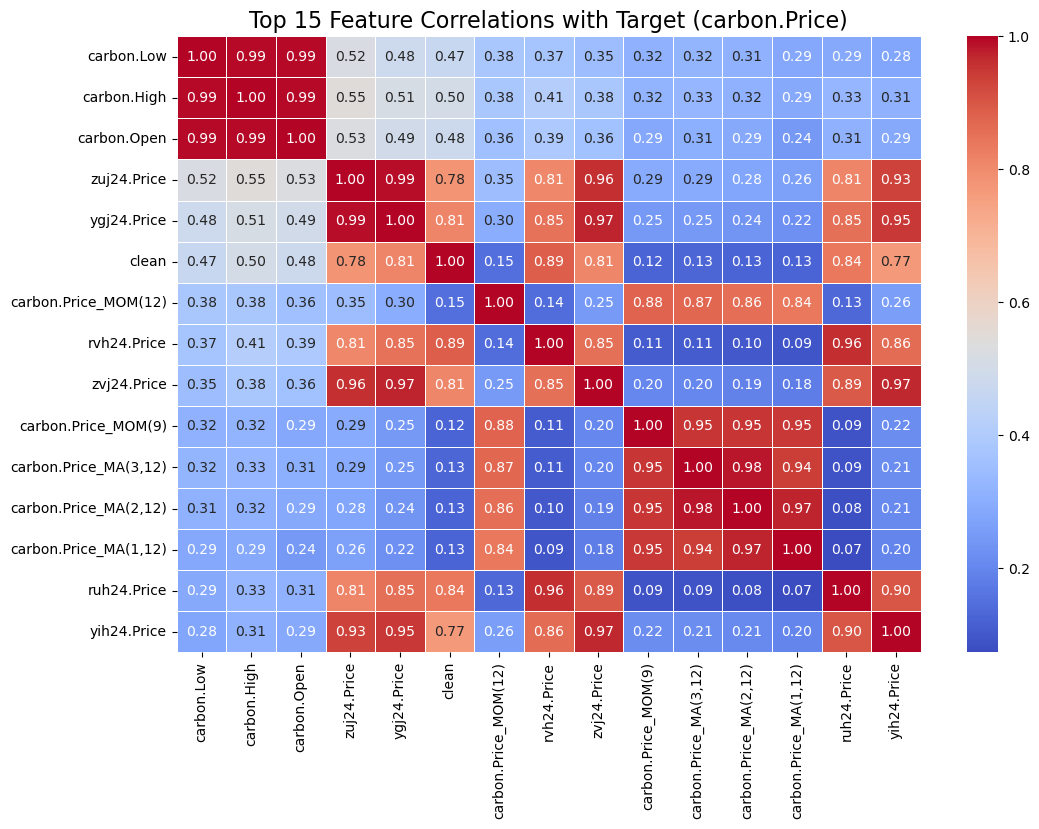

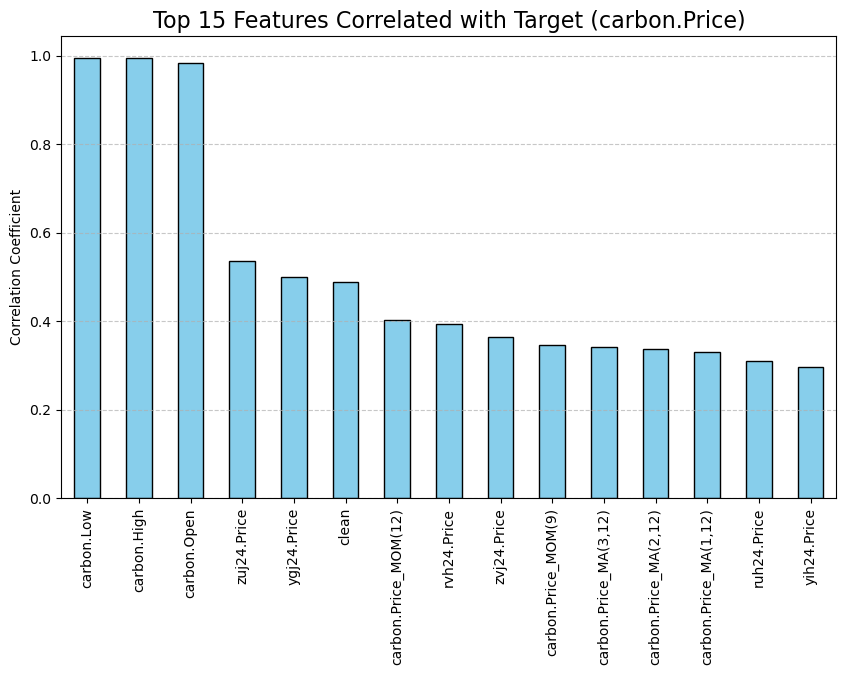

/opt/anaconda3/envs/NN/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x800 with 0 Axes>

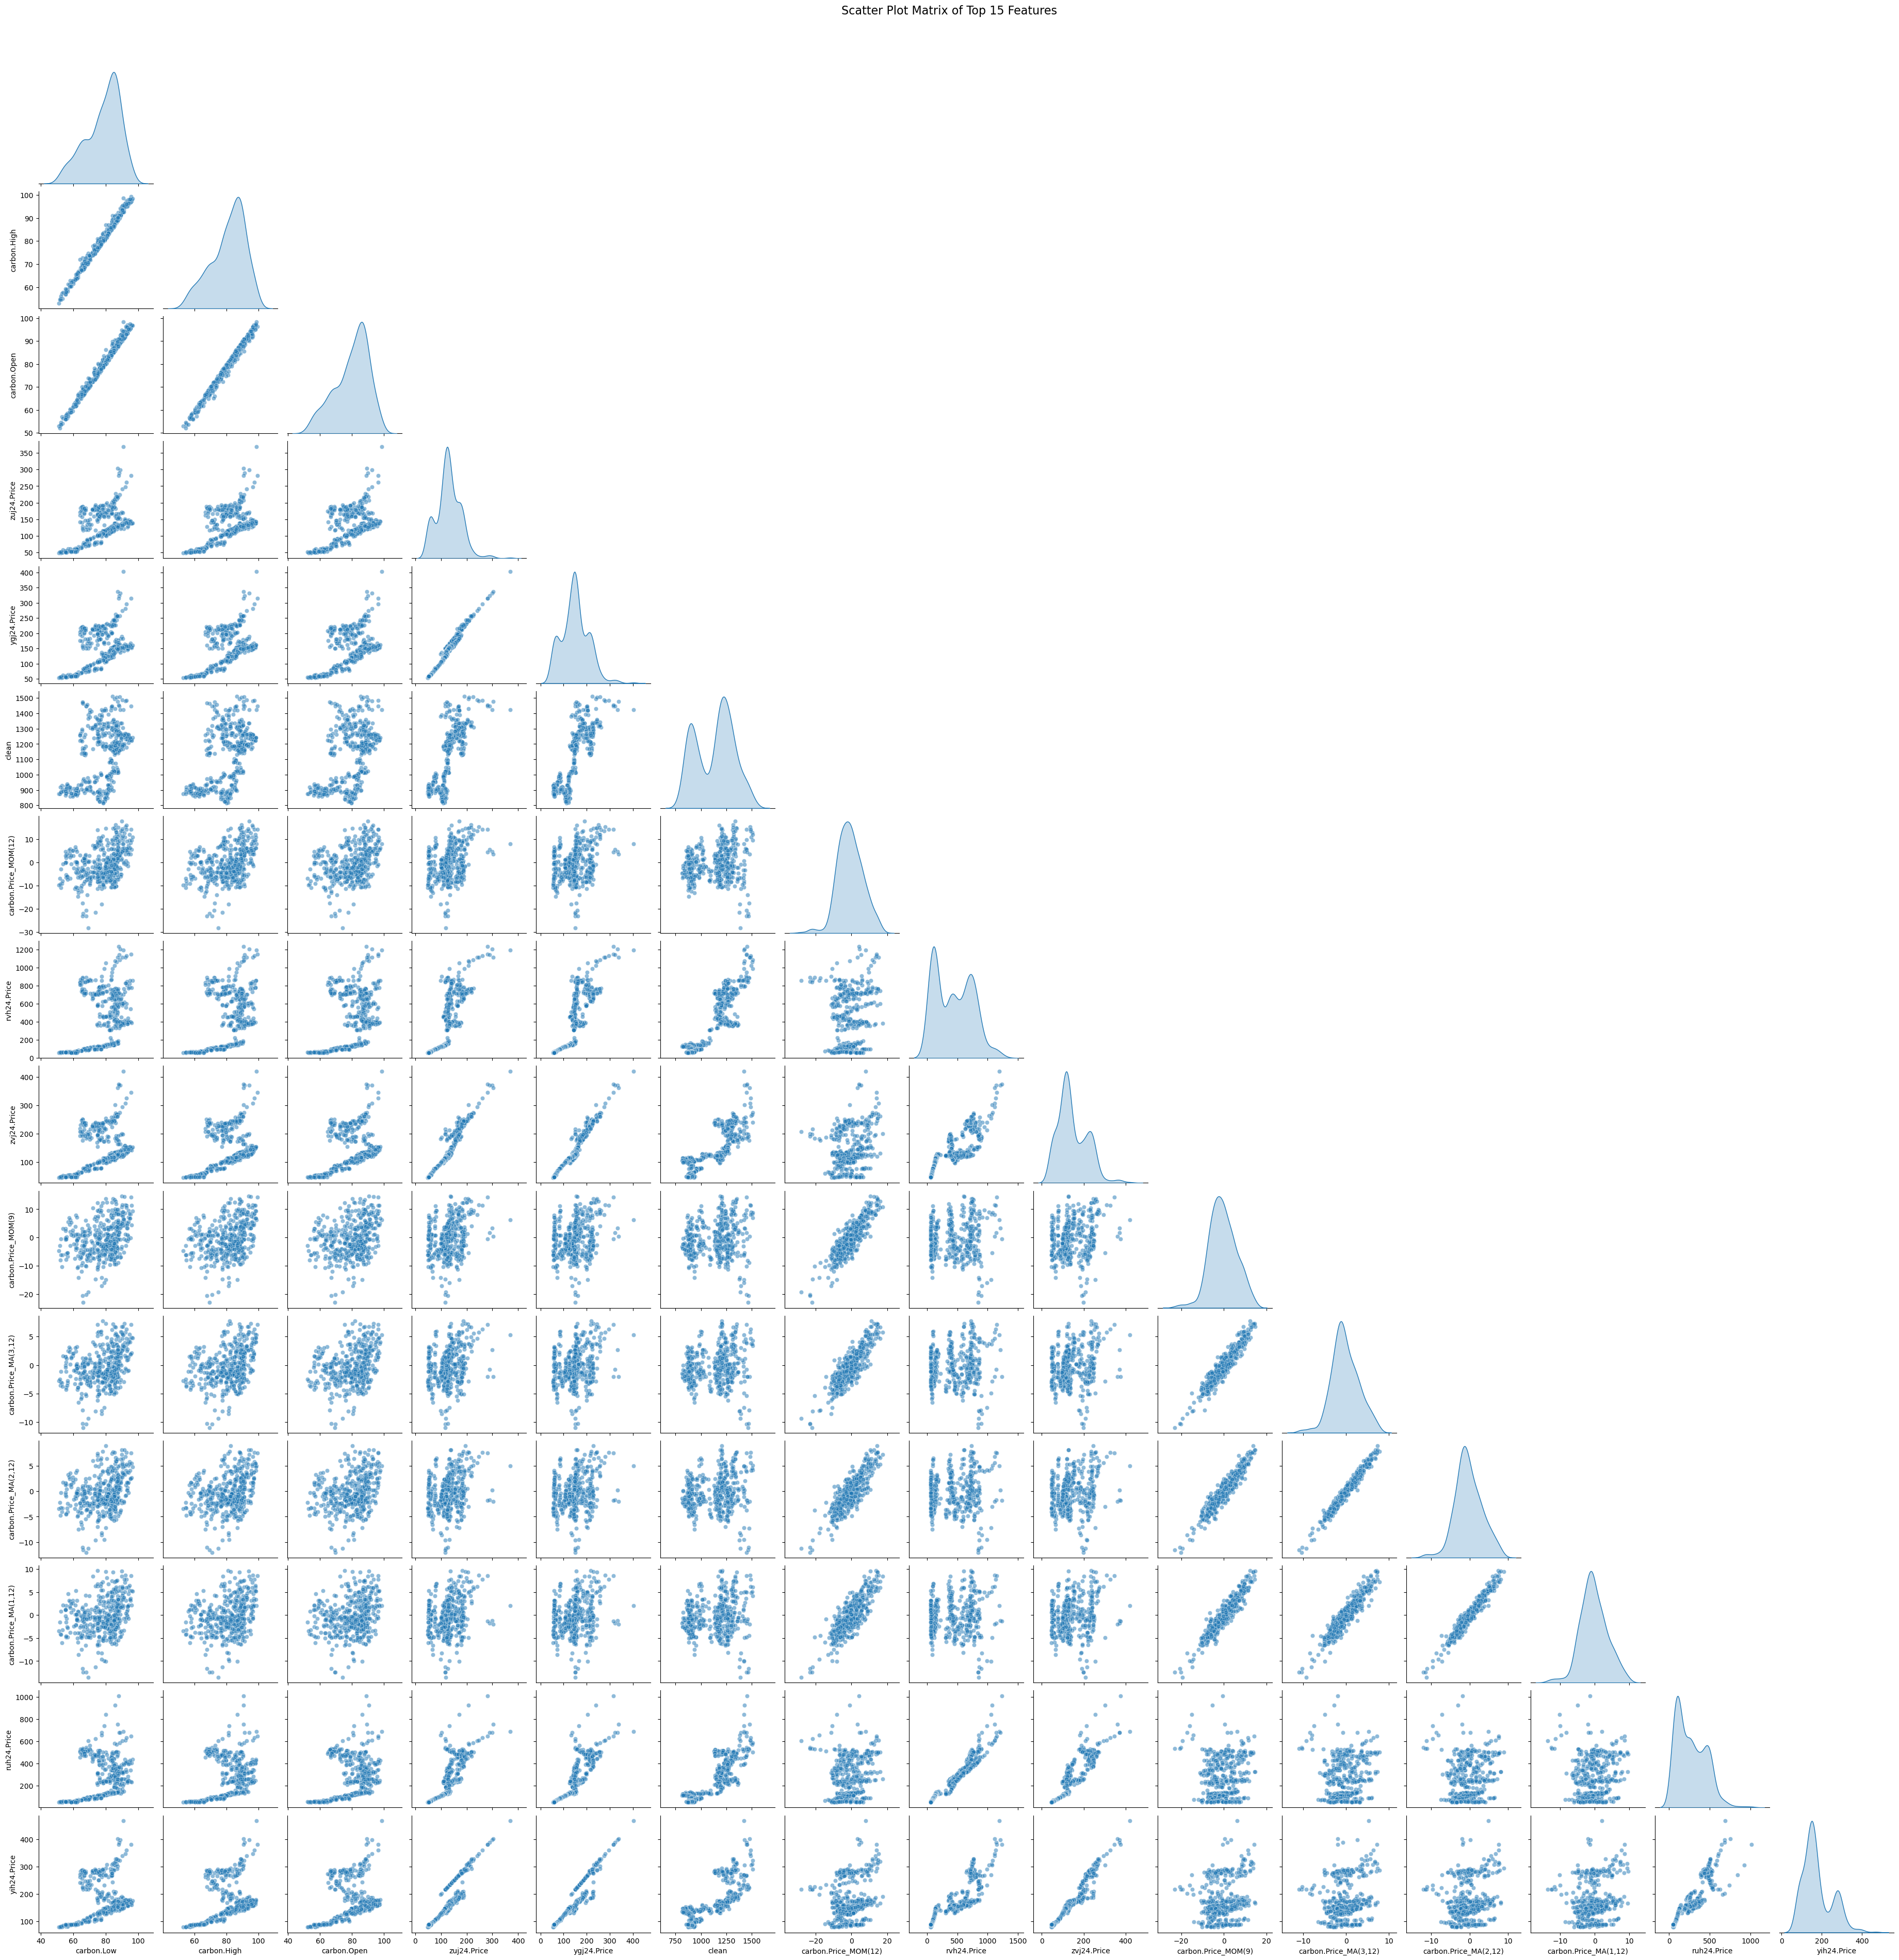

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# 將 Date 列設定為索引
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# 計算與目標變數 'carbon.Price' 的相關係數
target = 'carbon.Price'
correlation = df.corr()[target].sort_values(ascending=False)

# 選出與目標變數相關性最強的前 15 個特徵（排除 'carbon.Price' 自身）
top_features = correlation.index[1:16]

# 繪製相關性熱圖
plt.figure(figsize=(12, 8))
sns.heatmap(df[top_features].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Top 15 Feature Correlations with Target (carbon.Price)', fontsize=16)
plt.show()

# 繪製相關性條形圖
plt.figure(figsize=(10, 6))
correlation[1:16].plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 15 Features Correlated with Target (carbon.Price)', fontsize=16)
plt.ylabel('Correlation Coefficient')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 繪製特徵之間的散點圖矩陣
plt.figure(figsize=(12, 8))
sns.pairplot(df[top_features], kind="scatter", diag_kind="kde", corner=True, plot_kws={"alpha": 0.5})
plt.suptitle('Scatter Plot Matrix of Top 15 Features', fontsize=16, y=1.02)
plt.show()

Test,Predict Split

In [30]:
from sklearn.model_selection import train_test_split
import numpy as np

# 篩選高相關特徵
selected_features = top_features.tolist()

# 提取目標變數和特徵
X = df[selected_features]
y = df[target]

# 分割訓練集（前 376 天）和測試集（最後 60 天）
X_train, X_test = X[:-60], X[-60:]
y_train, y_test = y[:-60], y[-60:]

In [31]:
print(y_test.index)  # 打印測試集的日期範圍

DatetimeIndex(['2024-01-04', '2024-01-05', '2024-01-08', '2024-01-09',
               '2024-01-10', '2024-01-11', '2024-01-12', '2024-01-15',
               '2024-01-16', '2024-01-17', '2024-01-18', '2024-01-19',
               '2024-01-22', '2024-01-23', '2024-01-24', '2024-01-25',
               '2024-01-26', '2024-01-29', '2024-01-30', '2024-01-31',
               '2024-02-01', '2024-02-02', '2024-02-05', '2024-02-06',
               '2024-02-07', '2024-02-08', '2024-02-09', '2024-02-12',
               '2024-02-13', '2024-02-14', '2024-02-15', '2024-02-16',
               '2024-02-19', '2024-02-20', '2024-02-21', '2024-02-22',
               '2024-02-23', '2024-02-26', '2024-02-27', '2024-02-28',
               '2024-02-29', '2024-03-01', '2024-03-04', '2024-03-05',
               '2024-03-06', '2024-03-07', '2024-03-08', '2024-03-11',
               '2024-03-12', '2024-03-13', '2024-03-14', '2024-03-15',
               '2024-03-18', '2024-03-19', '2024-03-20', '2024-03-21',
      

Feature Select

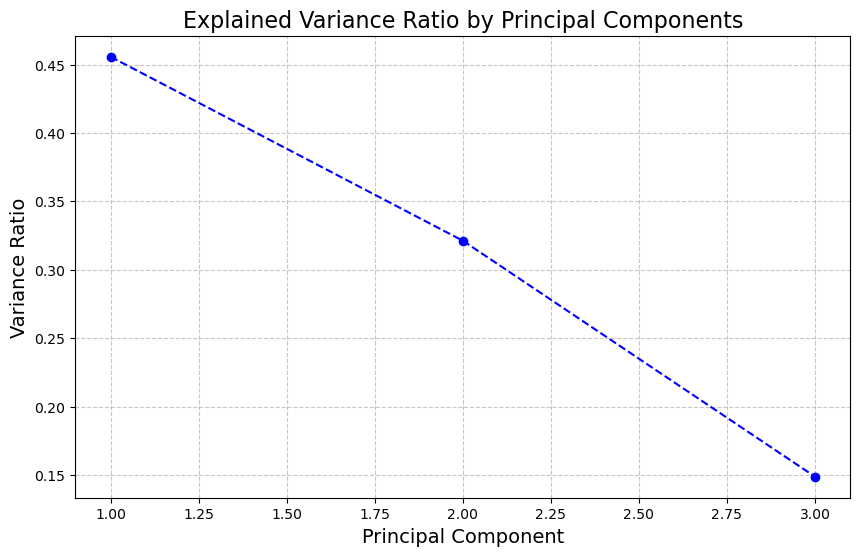

Cumulative Explained Variance: [0.45569385 0.77697368 0.92579312]

Top 10 Features by Principal Component:
Principal Component 1:
zuj24.Price    0.332562
ygj24.Price    0.326227
zvj24.Price    0.306608
yih24.Price    0.300590
rvh24.Price    0.275054
Name: 0, dtype: float64


Principal Component 2:
carbon.Price_MA(2,12)    0.294209
carbon.Price_MA(3,12)    0.293280
carbon.Price_MOM(9)      0.289218
carbon.Price_MA(1,12)    0.287287
ruh24.Price              0.284170
Name: 1, dtype: float64


Principal Component 3:
carbon.Open              0.489209
carbon.High              0.471336
carbon.Low               0.466565
carbon.Price_MA(1,12)    0.263460
carbon.Price_MA(2,12)    0.243142
Name: 2, dtype: float64




In [32]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 標準化數據
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# 使用 PCA 降維
pca = PCA(n_components=3)  # 保留 10 個主要成分
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_scaled = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaled)

# 可視化 PCA 結果：每個主成分的解釋變異比例
plt.figure(figsize=(10, 6))
plt.plot(range(1, 4), pca.explained_variance_ratio_, marker='o', linestyle='--', color='b')
plt.title('Explained Variance Ratio by Principal Components', fontsize=16)
plt.xlabel('Principal Component', fontsize=14)
plt.ylabel('Variance Ratio', fontsize=14)
plt.grid(alpha=0.7, linestyle='--')
plt.show()

# 查看累積解釋變異比例
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print("Cumulative Explained Variance:", cumulative_variance)

# 列出每個主成分的特徵貢獻
feature_names = X_train.columns  # 假設 X_train 是帶有列名的 DataFrame
components = pd.DataFrame(pca.components_, columns=feature_names)

# 打印每個主成分中對應的前 10 大特徵
print("\nTop 10 Features by Principal Component:")
for i in range(3):
    print(f"Principal Component {i+1}:")
    top_features = components.iloc[i].abs().sort_values(ascending=False).head(5)
    print(top_features)
    print("\n")

In [33]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor

# 使用隨機森林評估特徵重要性
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# 獲取特徵重要性
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("特徵重要性排序：")
print(feature_importance)

特徵重要性排序：
                  feature  importance
1             carbon.High    0.554910
0              carbon.Low    0.435482
12  carbon.Price_MA(1,12)    0.002256
2             carbon.Open    0.001107
9     carbon.Price_MOM(9)    0.000970
6    carbon.Price_MOM(12)    0.000788
5                   clean    0.000610
11  carbon.Price_MA(2,12)    0.000580
8             zvj24.Price    0.000578
7             rvh24.Price    0.000550
13            ruh24.Price    0.000488
10  carbon.Price_MA(3,12)    0.000478
3             zuj24.Price    0.000422
4             ygj24.Price    0.000400
14            yih24.Price    0.000381


In [34]:
from sklearn.feature_selection import RFE

# 遞歸特徵消除
rfe_selector = RFE(estimator=RandomForestRegressor(), n_features_to_select=15)
rfe_selector = rfe_selector.fit(X_train, y_train)

# 獲取被選中的特徵
selected_features = X_train.columns[rfe_selector.support_]
print("遞歸特徵消除選擇的特徵：")
print(selected_features)

遞歸特徵消除選擇的特徵：
Index(['carbon.Low', 'carbon.High', 'carbon.Open', 'zuj24.Price',
       'ygj24.Price', 'clean', 'carbon.Price_MOM(12)', 'rvh24.Price',
       'zvj24.Price', 'carbon.Price_MOM(9)', 'carbon.Price_MA(3,12)',
       'carbon.Price_MA(2,12)', 'carbon.Price_MA(1,12)', 'ruh24.Price',
       'yih24.Price'],
      dtype='object')


In [35]:
# 結合多種方法的特徵選擇
def select_top_features(X_train, y_train, n_features=15):
    # 相關性分析
    corr_matrix = X_train.corr().abs()
    
    # 隨機森林特徵重要性
    rf_model = RandomForestRegressor()
    rf_model.fit(X_train, y_train)
    rf_importance = rf_model.feature_importances_
    
    # 綜合排序
    feature_scores = pd.DataFrame({
        'feature': X_train.columns,
        'rf_importance': rf_importance
    }).sort_values('rf_importance', ascending=False)
    
    return feature_scores['feature'][:n_features].tolist()

# 選擇top特徵
top_features = select_top_features(X_train, y_train)
print("綜合篩選的top特徵：")
print(top_features)

# 使用篩選後的特徵進行建模
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

綜合篩選的top特徵：
['carbon.High', 'carbon.Low', 'carbon.Price_MA(1,12)', 'carbon.Open', 'carbon.Price_MOM(9)', 'carbon.Price_MOM(12)', 'clean', 'carbon.Price_MA(2,12)', 'carbon.Price_MA(3,12)', 'zvj24.Price', 'ruh24.Price', 'zuj24.Price', 'rvh24.Price', 'ygj24.Price', 'yih24.Price']


SVM Model

In [36]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 分割資料（前 376 天為訓練集，後 60 天為測試集）
X_train, X_test = X[:-60], X[-60:]
y_train, y_test = y[:-60], y[-60:]

# 標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 定義核函數的超參數搜尋範圍
param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.2, 0.5],
    'gamma': ['scale', 'auto'],  # 只對 rbf 和 sigmoid 核適用
    'degree': [2, 3, 4],          # 只對 poly 核需要設置 degree 參數
}

# 核函數類型的列表
kernels = ['poly', 'linear', 'rbf', 'sigmoid']

# 儲存每個核函數的最佳參數
best_params = {}

# 對每個核函數進行 GridSearchCV
for kernel in kernels:
    print(f"Searching best parameters for kernel = {kernel}")
    
    # 根據不同的核函數，修改 param_grid
    if kernel == 'poly':
        param_grid['kernel'] = ['poly']
    elif kernel == 'linear':
        param_grid['kernel'] = ['linear']
    elif kernel == 'rbf':
        param_grid['kernel'] = ['rbf']
    elif kernel == 'sigmoid':
        param_grid['kernel'] = ['sigmoid']
    
    # 創建 SVM 模型
    svm_model = SVR()

    # 使用 GridSearchCV 搜索最佳參數
    grid_search = GridSearchCV(svm_model, param_grid, cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(X_train_scaled, y_train)

    # 儲存最佳參數
    best_params[kernel] = grid_search.best_params_
    print(f"Best parameters for {kernel}: {grid_search.best_params_}\n")
    
# 顯示每個核函數的最佳參數
print("Best parameters for each kernel:")
for kernel, params in best_params.items():
    print(f"{kernel}: {params}")

# 使用最佳參數的 SVM 模型進行訓練和預測
for kernel in kernels:
    print(f"Evaluating model with kernel = {kernel}")
    
    # 取得最佳參數
    best_svm_model = SVR(**best_params[kernel])
    best_svm_model.fit(X_train_scaled, y_train)

    # 預測
    train_predictions = best_svm_model.predict(X_train_scaled)
    test_predictions = best_svm_model.predict(X_test_scaled)

    # 評估
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    print(f"Training RMSE for {kernel}: {train_rmse:.4f}, R²: {train_r2:.4f}")
    print(f"Testing RMSE for {kernel}: {test_rmse:.4f}, R²: {test_r2:.4f}\n")


Searching best parameters for kernel = poly
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best parameters for poly: {'C': 100, 'degree': 3, 'epsilon': 0.01, 'gamma': 'auto', 'kernel': 'poly'}

Searching best parameters for kernel = linear
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best parameters for linear: {'C': 10, 'degree': 2, 'epsilon': 0.01, 'gamma': 'scale', 'kernel': 'linear'}

Searching best parameters for kernel = rbf
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best parameters for rbf: {'C': 100, 'degree': 2, 'epsilon': 0.2, 'gamma': 'auto', 'kernel': 'rbf'}

Searching best parameters for kernel = sigmoid
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best parameters for sigmoid: {'C': 1, 'degree': 2, 'epsilon': 0.01, 'gamma': 'auto', 'kernel': 'sigmoid'}

Best parameters for each kernel:
poly: {'C': 100, 'degree': 3, 'epsilon': 0.01, 'gamma': 'auto', 'kernel': 'poly'}
linear: {'C': 10, 'degree': 2, 'epsilon'

Adding SlidingWindow

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 分割資料（前 376 天為訓練集，後 60 天為測試集）
X_train, X_test = X[:-60], X[-60:]
y_train, y_test = y[:-60], y[-60:]

# 標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 訓練 SVM 模型
svm_model = SVR(kernel='sigmoid', C=0.1, epsilon=0.2, degree=2)
svm_model.fit(X_train_scaled, y_train)

# 預測
train_predictions = svm_model.predict(X_train_scaled)
test_predictions = svm_model.predict(X_test_scaled)

# 評估
# 計算 RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

print(f"Training RMSE: {train_rmse:.4f}, R²: {train_r2:.4f}")
print(f"Testing RMSE: {test_rmse:.4f}, R²: {test_r2:.4f}")

# 可視化
plt.figure(figsize=(14, 6))

# 訓練數據擬合
plt.subplot(1, 2, 1)
plt.plot(df.index[:len(y_train)], y_train, label='True Values', color='blue', alpha=0.6, linewidth=2)
plt.plot(df.index[:len(train_predictions)], train_predictions, label='SVM Fit', color='red', alpha=0.6, linewidth=2)
plt.title('Training Data Fit with SVM (kernal = "sigmoid")')
plt.xlabel('Date')
plt.ylabel('Target Value')
plt.legend()
# 設定 X 軸每個月顯示一次
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # 每個月顯示一次
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # 顯示格式：年-月
# 旋轉日期標籤
plt.gcf().autofmt_xdate()
plt.grid(alpha=0.5)

# 測試數據預測
plt.subplot(1, 2, 2)
plt.plot(df.index[-len(y_test):], y_test, label='True Values', color='blue', alpha=0.6, linewidth=2)
plt.plot(df.index[-len(test_predictions):], test_predictions, label='SVM Predict', color='green', alpha=0.6, linewidth=2)
plt.title('Testing Data Predictions with SVM (kernal = "sigmoid")')
plt.xlabel('Date')
plt.ylabel('Target Value')
plt.legend()
# 設定 X 軸每個月顯示一次
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # 每個月顯示一次
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # 顯示格式：年-月
# 旋轉日期標籤
plt.gcf().autofmt_xdate()
plt.grid(alpha=0.5)

plt.tight_layout()
plt.show()

5 cross validation

In [51]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.model_selection import cross_val_score, KFold



# 選擇特徵與目標
features = ['carbon.High', 'carbon.Low', 'carbon.Price_MA(1,12)', 'carbon.Open', 'carbon.Price_MOM(9)', 'carbon.Price_MOM(12)', 'clean', 'carbon.Price_MA(2,12)', 'carbon.Price_MA(3,12)', 'zvj24.Price', 'ruh24.Price', 'rvh24.Price', 'ygj24.Price', 'yih24.Price']
target = 'carbon.Price'

X = df[features].values
y = df[target].values

# 參數設置
window_size = 90
test_size = 60
start_index = len(df) - test_size  # 測試集開始的位置
scaler = StandardScaler()


# 訓練集預測（滑動窗口）
train_predictions = []
train_true_values = []
train_dates = []
for i in range(window_size, start_index):
    X_train_window = X[i-window_size:i]
    y_train_window = y[i-window_size:i]
    X_test_window = X[i:i+1]

    # 標準化
    X_train_scaled = scaler.fit_transform(X_train_window)
    X_test_scaled = scaler.transform(X_test_window)

    # 模型設定
    svr = SVR(kernel='linear', C=10, epsilon=0.01, degree=1)

    # 5-fold cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(svr, X_train_scaled, y_train_window, cv=kf, scoring='neg_mean_squared_error')
    mean_cv_score = -cv_scores.mean()
    print(f"Window {i} - 5-Fold CV Mean MSE: {mean_cv_score:.4f}")

    # 模型訓練
    svr.fit(X_train_scaled, y_train_window)

    # 預測
    y_pred = svr.predict(X_test_scaled)[0]
    train_predictions.append(y_pred)
    train_true_values.append(y[i])
    train_dates.append(df.index[i])

# 測試集預測（滑動窗口）
test_predictions = []
test_true_values = []
test_dates = []
for i in range(start_index, len(df)):
    X_train_window = X[i-window_size:i]
    y_train_window = y[i-window_size:i]
    X_test_window = X[i:i+1]

    # 標準化
    X_train_scaled = scaler.fit_transform(X_train_window)
    X_test_scaled = scaler.transform(X_test_window)

    # 模型設定
    svr = SVR(kernel='linear', C=10, epsilon=0.01, degree=1)

    # 模型訓練
    svr.fit(X_train_scaled, y_train_window)

    # 預測
    y_pred = svr.predict(X_test_scaled)[0]
    test_predictions.append(y_pred)
    test_true_values.append(y[i])
    test_dates.append(df.index[i])

# 計算 RMSE 和 R^2
train_rmse = np.sqrt(mean_squared_error(train_true_values, train_predictions))
train_r2 = r2_score(train_true_values, train_predictions)
test_rmse = np.sqrt(mean_squared_error(test_true_values, test_predictions))
test_r2 = r2_score(test_true_values, test_predictions)

print(f"Training RMSE: {train_rmse:.4f}, Training R²: {train_r2:.4f}")
print(f"Test RMSE: {test_rmse:.4f}, Test R²: {test_r2:.4f}")


Window 90 - 5-Fold CV Mean MSE: 0.1502
Window 91 - 5-Fold CV Mean MSE: 0.1663
Window 92 - 5-Fold CV Mean MSE: 0.1390
Window 93 - 5-Fold CV Mean MSE: 0.1784
Window 94 - 5-Fold CV Mean MSE: 0.1427
Window 95 - 5-Fold CV Mean MSE: 0.1666
Window 96 - 5-Fold CV Mean MSE: 0.1521
Window 97 - 5-Fold CV Mean MSE: 0.1462
Window 98 - 5-Fold CV Mean MSE: 0.1548
Window 99 - 5-Fold CV Mean MSE: 0.1507
Window 100 - 5-Fold CV Mean MSE: 0.1421
Window 101 - 5-Fold CV Mean MSE: 0.1680
Window 102 - 5-Fold CV Mean MSE: 0.1636
Window 103 - 5-Fold CV Mean MSE: 0.1447
Window 104 - 5-Fold CV Mean MSE: 0.1785
Window 105 - 5-Fold CV Mean MSE: 0.1678
Window 106 - 5-Fold CV Mean MSE: 0.1649
Window 107 - 5-Fold CV Mean MSE: 0.1629
Window 108 - 5-Fold CV Mean MSE: 0.1929
Window 109 - 5-Fold CV Mean MSE: 0.1619
Window 110 - 5-Fold CV Mean MSE: 0.2133
Window 111 - 5-Fold CV Mean MSE: 0.1958
Window 112 - 5-Fold CV Mean MSE: 0.1974
Window 113 - 5-Fold CV Mean MSE: 0.1873
Window 114 - 5-Fold CV Mean MSE: 0.2906
Window 115

Training RMSE: 3.1801, Training R²: 0.7617
Test RMSE: 5.1381, Test R²: -0.1667


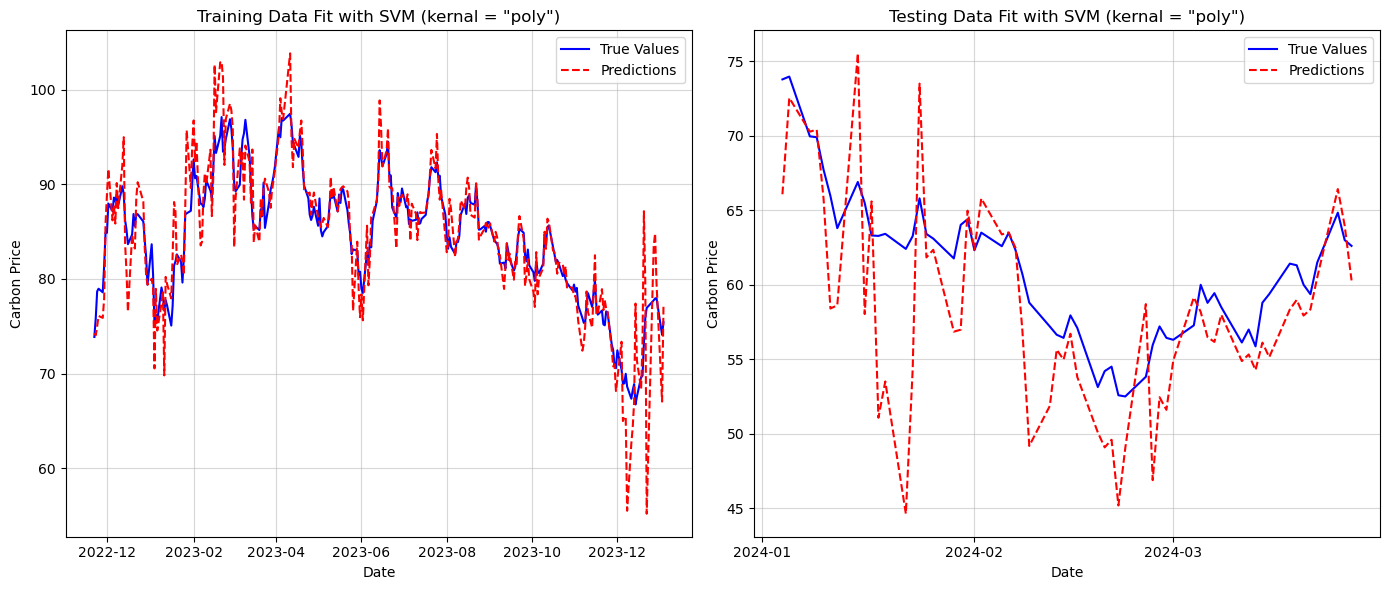

In [61]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import matplotlib.dates as mdates



# 選擇特徵與目標
features = ['carbon.High', 'carbon.Low', 'carbon.Price_MA(1,12)', 'carbon.Open', 'carbon.Price_MOM(9)', 'carbon.Price_MOM(12)', 'clean', 'carbon.Price_MA(2,12)', 'carbon.Price_MA(3,12)', 'ruh24.Price', 'zuj24.Price', 'rvh24.Price']
target = 'carbon.Price'

X = df[features].values
y = df[target].values

# 參數設置
window_size = 90
test_size = 60
start_index = len(df) - test_size  # 測試集開始的位置
scaler = StandardScaler()

# 訓練集預測（滑動窗口）
train_predictions = []
train_true_values = []
train_dates = []
for i in range(window_size, start_index):
    X_train_window = X[i-window_size:i]
    y_train_window = y[i-window_size:i]
    X_test_window = X[i:i+1]

    # 標準化
    X_train_scaled = scaler.fit_transform(X_train_window)
    X_test_scaled = scaler.transform(X_test_window)

    # 模型訓練
    svr = SVR(kernel='poly', C=100, epsilon=0.01,degree=3)
    svr.fit(X_train_scaled, y_train_window)

    # 預測
    y_pred = svr.predict(X_test_scaled)[0]
    train_predictions.append(y_pred)
    train_true_values.append(y[i])
    train_dates.append(df.index[i])

# 測試集預測（滑動窗口）
test_predictions = []
test_true_values = []
test_dates = []
for i in range(start_index, len(df)):
    X_train_window = X[i-window_size:i]
    y_train_window = y[i-window_size:i]
    X_test_window = X[i:i+1]

    # 標準化
    X_train_scaled = scaler.fit_transform(X_train_window)
    X_test_scaled = scaler.transform(X_test_window)

    # 模型訓練
    svr = SVR(kernel='poly', C=100, epsilon=0.01,degree=3)
    svr.fit(X_train_scaled, y_train_window)

    # 預測
    y_pred = svr.predict(X_test_scaled)[0]
    test_predictions.append(y_pred)
    test_true_values.append(y[i])
    test_dates.append(df.index[i])

# 計算 RMSE 和 R^2
train_rmse = np.sqrt(mean_squared_error(train_true_values, train_predictions))
train_r2 = r2_score(train_true_values, train_predictions)
test_rmse = np.sqrt(mean_squared_error(test_true_values, test_predictions))
test_r2 = r2_score(test_true_values, test_predictions)

print(f"Training RMSE: {train_rmse:.4f}, Training R²: {train_r2:.4f}")
print(f"Test RMSE: {test_rmse:.4f}, Test R²: {test_r2:.4f}")

# 評估與可視化
plt.figure(figsize=(14, 6))

# 訓練集圖表
plt.subplot(1, 2, 1)
plt.plot(train_dates, train_true_values, label='True Values', color='blue')
plt.plot(train_dates, train_predictions, label='Predictions', color='red', linestyle='--')
plt.title('Training Data Fit with SVM (kernal = "poly")')
plt.xlabel("Date")
plt.ylabel("Carbon Price")
plt.legend()
plt.grid(alpha=0.5)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))

# 測試集圖表
plt.subplot(1, 2, 2)
plt.plot(test_dates, test_true_values, label='True Values', color='blue')
plt.plot(test_dates, test_predictions, label='Predictions', color='red', linestyle='--')
plt.title('Testing Data Fit with SVM (kernal = "poly")')
plt.xlabel("Date")
plt.ylabel("Carbon Price")
plt.legend()
plt.grid(alpha=0.5)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.tight_layout()
plt.show()


In [47]:
# 將測試集預測值存成 NumPy array
test_predictions_array = np.array(test_predictions)

# 將測試集預測值與對應日期存成 DataFrame（可選）
test_results_df = pd.DataFrame({
    'Date': test_dates,
    'True Value': test_true_values,
    'Predicted Value': test_predictions
})

# 可選：將結果輸出成 CSV 檔案
test_results_df.to_csv("test_predictions_SVM_new_linear.csv", index=False)

# 輸出測試集預測的 NumPy array
print("Test Predictions Array:")
print(test_predictions_array)

Test Predictions Array:
[73.77990147 73.61466938 69.78060583 69.6225525  68.06981729 65.74735561
 64.41102953 68.09470505 65.42482481 63.27415793 63.16505188 63.56820339
 61.73554283 62.9719317  65.93214635 63.93266996 63.34759924 62.35225585
 63.8343047  64.47388231 62.56058072 63.66812597 63.00548352 63.60634356
 62.35493959 60.78600357 58.50805575 56.94707303 56.56246683 56.32669132
 58.0851632  57.04083337 53.37867933 54.17589865 54.36068213 52.77989724
 52.53600949 53.62728575 55.64338846 57.90012655 56.67462515 56.2596707
 56.77217039 60.22204711 59.62011308 59.46328524 58.30260942 55.94118548
 56.98045849 56.29535082 58.5188678  59.59798668 61.5331111  61.01572297
 60.16572724 59.25061203 61.14033107 64.77354481 62.75815819 61.9567128 ]


/opt/anaconda3/envs/NN/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/NN/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/NN/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/NN/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/NN/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/NN/lib/python3.8/site-packages/sklearn/b

Sliding Window RMSE (Test Set): 1.1357
Training RMSE (Train Set): 12.2304
Testing RMSE (Test Set): 1.1357


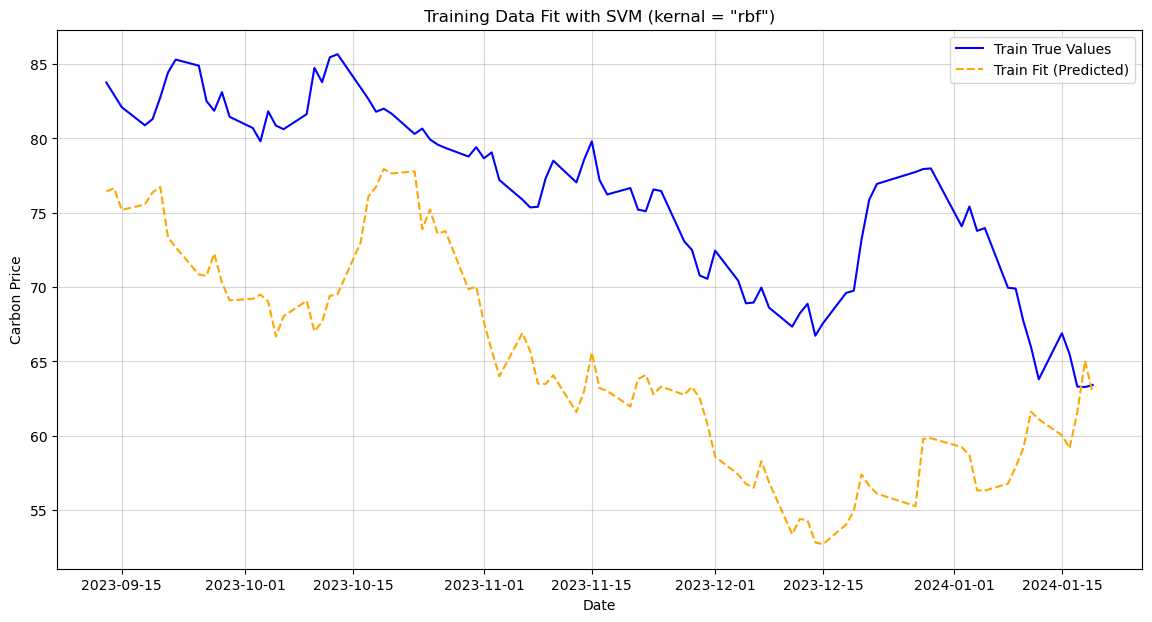

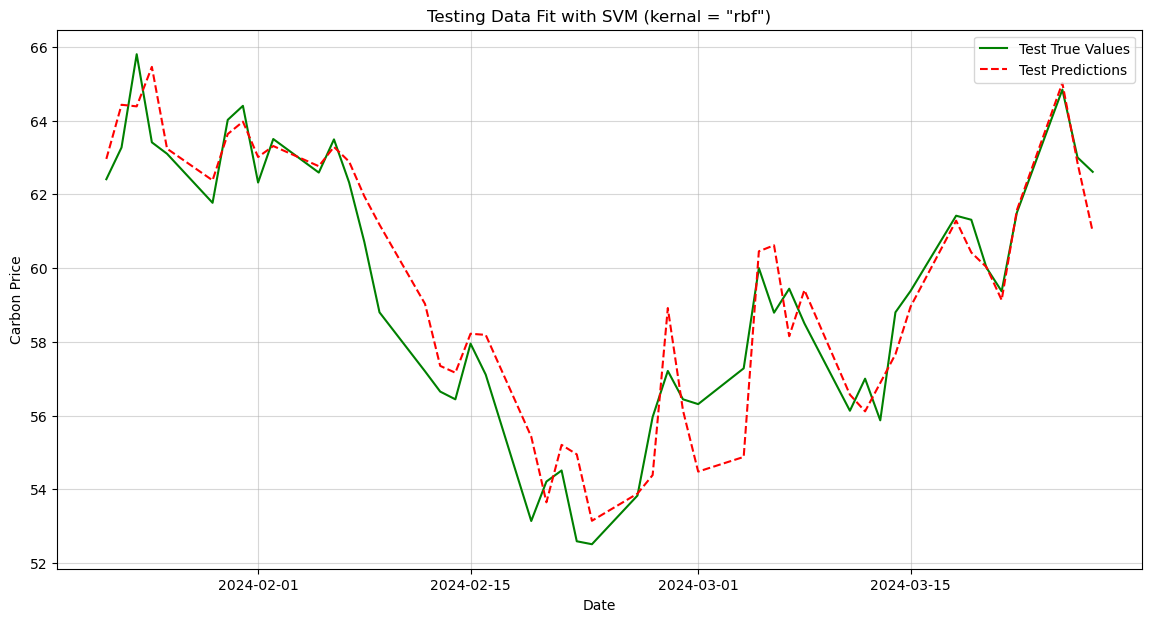

In [29]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# 假設您已經有 df 資料框，並將 Date 設為索引
# 設定窗口大小與起始點
window_size = 90  # 前 90 天作為窗口
start_index = 388  # 第 389 項（從 0 開始計數）
test_size=60

# 存儲預測結果
sliding_predictions = []
sliding_fit = []
true_values = []

# Sliding Window 預測
for i in range(start_index, len(df)):
    # 定義訓練窗口
    train_window = df.iloc[i-window_size:i]
    test_point = df.iloc[i]
    
    # 使用前10個特徵進行預測
    selected_features = ['carbon.High', 'carbon.Low', 'carbon.Open', 'carbon.Open_lag3', 'carbon.Price_lag1', 
                         'carbon.Low_lag1', 'carbon.High_lag2', 'carbon.High_lag1', 'carbon.Low_lag3', 'carbon.High_lag3']
    X_train = train_window[selected_features]
    y_train = train_window['carbon.Price']
    
    # 測試點（單一天）
    X_test = test_point[selected_features].values.reshape(1, -1)
    y_test = test_point['carbon.Price']
    
    # 標準化
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # 訓練 SVM 模型
    svm_model = SVR(kernel='rbf', C=100, epsilon=0.2,degree=2)
    svm_model.fit(X_train_scaled, y_train)
    
    # 預測測試集
    test_prediction = svm_model.predict(X_test_scaled)
    sliding_predictions.append(test_prediction[0])
    
    # 預測訓練集（擬合效果）
    train_fit = svm_model.predict(X_train_scaled)
    sliding_fit.extend(train_fit.tolist())
    
    # 儲存真實值
    true_values.append(y_test)

# 計算 RMSE
sliding_rmse = np.sqrt(mean_squared_error(true_values, sliding_predictions))
print(f"Sliding Window RMSE (Test Set): {sliding_rmse:.4f}")

# 訓練集擬合的 RMSE
# 訓練集擬合的 RMSE
train_fit_corrected = sliding_fit[-window_size:]  # 僅取最後一個訓練窗口的擬合結果
train_true_values = df['carbon.Price'][start_index-window_size:start_index]
train_rmse = np.sqrt(mean_squared_error(train_true_values, train_fit_corrected))
print(f"Training RMSE (Train Set): {train_rmse:.4f}")

# 測試集的 RMSE
test_true_values = df['carbon.Price'][start_index:start_index+test_size]
test_rmse = np.sqrt(mean_squared_error(test_true_values, sliding_predictions))
print(f"Testing RMSE (Test Set): {test_rmse:.4f}")


# 可視化結果 - 訓練集擬合效果
# 訓練集圖表
plt.figure(figsize=(14, 7))
plt.plot(
    df.index[start_index-window_size:start_index],
    train_true_values,
    label='Train True Values',
    color='blue'
)
plt.plot(
    df.index[start_index-window_size:start_index],
    train_fit_corrected,
    label='Train Fit (Predicted)',
    color='orange',
    linestyle='--'
)
plt.title('Training Data Fit with SVM (kernal = "rbf")')
plt.xlabel('Date')
plt.ylabel('Carbon Price')
plt.legend()
plt.grid(alpha=0.5)
plt.show()

# 可視化結果 - 測試集預測結果
plt.figure(figsize=(14, 7))
plt.plot(
    df.index[start_index:start_index+test_size],
    test_true_values,
    label='Test True Values',
    color='green'
)
plt.plot(
    df.index[start_index:start_index+test_size],
    sliding_predictions,
    label='Test Predictions',
    color='red',
    linestyle='--'
)
plt.title('Testing Data Fit with SVM (kernal = "rbf")')
plt.xlabel('Date')
plt.ylabel('Carbon Price')
plt.legend()
plt.grid(alpha=0.5)
plt.show()


Output the Result as csv
